# Проект E-commerce

In [315]:
import pandas as pd
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

In [316]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp',
                                                              'order_approved_at',
                                                              'order_delivered_carrier_date',
                                                              'order_delivered_customer_date',
                                                              'order_estimated_delivery_date'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [317]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [318]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [319]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [320]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [321]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [322]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## Задача 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Примем за покупку факт оплаты. **Следовательно**, если у нас есть значение в order_approved_at - то оплата произошла => покупка произошла

In [323]:
customers.merge(orders, how='left', on='customer_id') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count'}) \
    .rename(columns={'order_approved_at': 'paid_orders_count'}) \
    .query('paid_orders_count == 1') \
    .count()[0]

93049

## Задача 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Найдем разницу *diff* между **ожидаемым** временем доставки и **фактическим**. Если эта разница отрицательная, то заказ не был доставлен вовремя, их и будет далее детализировать по причинам.

In [324]:
orders['diff'] = orders.order_estimated_delivery_date - orders.order_delivered_customer_date

Добавим **флаг** *flag*, чтобы разделить отрицательный *diff* от положительного.

In [325]:
a = timedelta(0)
orders['flag'] = orders['diff'].apply(lambda x: x > a)

В задании речь идет про месяца, поэтому **извлечем** из дат соответствующие **месяца и года**.

In [326]:
orders['orders_estimated_delivery_month'] = orders['order_estimated_delivery_date'].dt.month_name()
orders['order_delivered_customer_month'] = orders['order_delivered_customer_date'].dt.month_name()
orders['order_delivered_customer_year'] = orders['order_delivered_customer_date'].dt.year
orders['orders_estimated_delivery_year'] = orders['order_estimated_delivery_date'].dt.year

Напишем функцию, определяющую причину недоставки в зависимости от выполнения условий.
Исходя из представленных данных у нас есть 3 типа причин недоставки:
1) Если **предел даты доставки поставщиком *shipping_limit_date* меньше чем фактическая дата получения поставщиком *order_delivered_carrier_date***, то значит на стороне поставщика возникла проблема. Ее будем классифицировать как **Shipping problems**;
2) Если ***order_status* принимает значение *canceled***, то это значит, что заказ не был доставлен из-за его отмены клиентом. Эту причину будем классифицировать как **Order has been canceled**;
3) **В иных случаях**, мы не можем наверняка знать причину. Единственное что мы о таких покупках знаем, что фактическое время доставки было больше, чем ожидаемое. Такое будем классифицировать как **Long delivery to customer**

**Также**, если *order_status = unavailable* или *shipped*, то мы **не можем узнать** наверняка, будет ли задержка в поставке или нет, поэтому уберем их из общего пула.

In [327]:
def reason_finder(row):
    if row['shipping_limit_date'] < row['order_delivered_carrier_date']:     
        return 'Shipping problems'    
    # Если условие выполняется, то максимальная дата доставки продавцом для передачи заказа партнеру по логистике была нарушена
    
    elif row['order_status'] == 'canceled':
        return 'Order has been canceled'
    # Если условие выполняется, то клиент отменил заказ

    elif row['diff'].total_seconds() < 0:
        return 'Long delivery to customer'
    # Если условие выполняется, то заказ не был доставлен во время, но проблема неизвестна
    
orders['reason'] = orders.query('flag == False') \
    .merge(order_items, how='left', on='order_id') \
    .query('order_status != "unavailable"') \
    .query('order_status != "shipped"') \
    .apply(lambda row: reason_finder(row), axis=1)

In [328]:
reasons = pd.DataFrame(orders.reason \
                       .value_counts(normalize=True)) \
                       .reset_index() \
                       .rename(columns={'index': 'reason', 'reason': 'percent'})
reasons

,reason,percent
0,Long delivery to customer,0.662772
1,Shipping problems,0.263728
2,Order has been canceled,0.073500


### Среднее кол-во недоставленных товаров в срок в месяц:

In [329]:
orders.groupby(['orders_estimated_delivery_year', 'orders_estimated_delivery_month']) \
    .agg({'reason': 'count'}) \
    .reset_index() \
    .reason \
    .median()

350.0

### Распределение по причинам недоставки товаров в срок в месяц

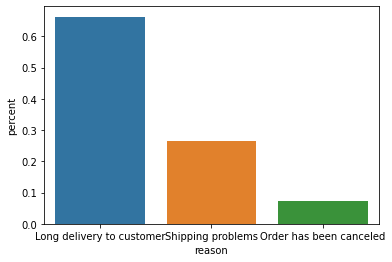

In [330]:
sns.barplot(data=reasons, x='reason', y='percent')

## Задача 3. По каждому товару определить, в какой день недели товар чаще всего покупается?

Достанем день недели из даты покупки

In [331]:
orders['order_approved_at_weekday'] = orders.order_approved_at.dt.day_name()

### Путем несложных операций выделим для каждого *product_id*  наболее популярный день для его покупки.

In [332]:
order_items.merge(orders, how='left', on='order_id') \
    .groupby(['product_id', 'order_approved_at_weekday']) \
    .agg({'order_id': 'count'}) \
    .sort_values(['product_id', 'order_approved_at_weekday', 'order_id'], ascending=False) \
    .groupby(['product_id']).head(1)

,,order_id
product_id,order_approved_at_weekday,
fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3
fff9553ac224cec9d15d49f5a263411f,Saturday,1
fff81cc3158d2725c0655ab9ba0f712c,Monday,1
fff6177642830a9a94a0f2cba5e476d1,Saturday,1
...,...,...
000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
000b8f95fcb9e0096488278317764d19,Wednesday,1
0009406fd7479715e4bef61dd91f2462,Friday,1


**Однако**, данный способ не устойчив к случаям, когда в разные дни недели **одинаковое** кол-во покупок.

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?  Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Достанем название месяца и год даты покупки.

In [333]:
orders['order_approved_at_month'] = orders['order_approved_at'].dt.month_name()
orders['order_approved_at_year'] = orders['order_approved_at'].dt.year

Напишем функцию, находящую кол-во дней в месяце с учетом високосности года

In [334]:
def weeks_in_month(df):
    normal_year = {
        'January': 31,
        'February': 28,
        'March': 31,
        'April': 30,
        'May': 31,
        'June': 30,
        'July': 31,
        'August': 31,
        'September': 30,
        'October': 31,
        'November': 30,
        'December': 31
    }
    
    leap_year = {
        'January': 31,
        'February': 29,
        'March': 31,
        'April': 30,
        'May': 31,
        'June': 30,
        'July': 31,
        'August': 31,
        'September': 30,
        'October': 31,
        'November': 30,
        'December': 31
    }
    if df['order_approved_at_year'] % 4 == 0:
        return round(leap_year[df['order_approved_at_month']] / 7, 2)
    else:
        return round(normal_year[df['order_approved_at_month']] / 7, 2)

In [335]:
orders_by_customers = orders.merge(customers, how='left', on='customer_id') \
    .groupby(['customer_unique_id', 'order_approved_at_year', 'order_approved_at_month'], as_index=False) \
    .agg({'order_approved_at': 'count'}) \
    .rename(columns={'order_approved_at': 'paid_orders_count'})

Получаем кол-во недель в месяце

In [336]:
orders_by_customers['weeks_in_month'] = orders_by_customers.apply(lambda x: weeks_in_month(x), axis=1)

Посчитаем среднее кол-во заказов в месяц

In [337]:
orders_by_customers['avg_paid_orders_in_week_by_month'] = round(orders_by_customers['paid_orders_count']/orders_by_customers['weeks_in_month'], 2)

### Получаем среднее кол-во покупок в неделю по месяцам

In [338]:
orders_by_customers.sort_values('avg_paid_orders_in_week_by_month', ascending=False)

,customer_unique_id,order_approved_at_year,order_approved_at_month,paid_orders_count,weeks_in_month,avg_paid_orders_in_week_by_month
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017.0,January,6,4.43,1.35
62114,a239b8e2fbce33780f1f1912e2ee5275,2017.0,February,4,4.00,1.00
23909,3e43e6105506432c953e165fb2acf44c,2018.0,February,4,4.00,1.00
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018.0,February,4,4.00,1.00
14471,25a560b9a6006157838aab1bdbd68624,2017.0,April,4,4.29,0.93
...,...,...,...,...,...,...
34240,592c4dd3ead25442e70463fb76c466e8,2018.0,January,1,4.43,0.23
34239,592aba1d8e1d592fc9be07cfa685e88f,2017.0,June,1,4.29,0.23
34238,59299ea0e75eec7b97507e1dc6ac13d1,2017.0,January,1,4.43,0.23
34237,59293545b02da9dd4e3e704c7e73f0d6,2017.0,November,1,4.29,0.23


## Задание 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для когортного анализа будем использовать месяца. Для этого:
1. Найдем **месяц первой покупки** и  **месяц второй покупки**. Затем, взяв **разницу между этими датами**, мы сможем понять, через сколько пользовательей вернулись за повторной покупкой.
3. Так, как в задании сказано на 3й месяц, то мы **разделим** кол-во пользователей, которые **вернулись к повторной покупке в течении 3х месяцев (90 дней)** на **всех пользователей, совершивших покупку в этом месяце**.

In [339]:
df2 = customers.merge(orders, how='left', on='customer_id')

### 1. Найдем месяц первой покупки и месяц второй покупки и возьмем разность.

In [340]:
the_first_and_the_second_paid_orders = df2[df2['order_approved_at'].notna()] \
    .groupby('customer_unique_id') \
    .agg({'order_approved_at': ['min', lambda x: sorted(x)[1] if len(x) >= 2 else sorted(x)[0]]}) \
    .reset_index().rename(columns={'<lambda_0>': 'second_min'}) \
    .assign(diff=lambda x: x['order_approved_at']['second_min'] - x['order_approved_at']['min']) \
    .sort_values('diff', ascending=False)

In [341]:
the_first_and_the_second_paid_orders.columns = the_first_and_the_second_paid_orders.columns.map('_'.join).str.strip()
the_first_and_the_second_paid_orders = the_first_and_the_second_paid_orders.rename(columns={'diff_': 'diff'})
the_first_and_the_second_paid_orders['diff_seconds'] = the_first_and_the_second_paid_orders['diff'].dt.total_seconds()

In [342]:
the_first_and_the_second_paid_orders.head()

,customer_unique_id_,order_approved_at_min,order_approved_at_second_min,diff,diff_seconds
76849,ccafc1c3f270410521c3c6f3b249870f,2016-10-07 10:13:16,2018-06-12 23:31:02,613 days 13:17:46,53011066.0
81451,d8f3c4f441a9b59a29f977df16724f38,2017-01-19 21:10:20,2018-08-25 04:05:18,582 days 06:54:58,50309698.0
55810,94e5ea5a8c1bf546db2739673060c43f,2016-10-06 15:59:50,2018-05-09 14:14:57,579 days 22:15:07,50105707.0
50940,87b3f231705783eb2217e25851c0a45d,2016-10-09 13:57:01,2018-05-04 11:51:35,571 days 21:54:34,49413274.0
29391,4e23e1826902ec9f208e8cc61329b494,2016-10-06 16:03:45,2018-03-14 22:29:49,524 days 06:26:04,45296764.0


### 2. Теперь найдем общее кол-во покупок в каждом месяце.

In [343]:
the_first_and_the_second_paid_orders['order_approved_at_min_month'] = the_first_and_the_second_paid_orders['order_approved_at_min'].dt.month_name()

In [344]:
total_paid_orders_in_month = the_first_and_the_second_paid_orders \
    .groupby('order_approved_at_min_month', as_index=False) \
    .agg({'diff': 'count'}) \
    .rename(columns={'diff': 'total_paid_orders_in_month'})

In [345]:
total_paid_orders_in_month.head()

,order_approved_at_min_month,total_paid_orders_in_month
0,April,8878
1,August,10602
2,December,5639
3,February,8165
4,January,7675


### 3. Разделим кол-во пользователей, которые совершили повторную покупку спустя 90 дней, после первой на общее число пользователей купивших что-либо в этом месяца

In [346]:
retention_rate_by_month = the_first_and_the_second_paid_orders \
    .query('diff_seconds > 0 and diff_seconds < 90*24*60*60') \
    .groupby('order_approved_at_min_month', as_index=False) \
    .agg({'diff': 'count'}) \
    .rename(columns={'diff': 'paid_orders_with_diff_less_than_90_days'}) \
    .merge(total_paid_orders_in_month, how='left', on='order_approved_at_min_month') \
    .assign(retention_on_3rd_month=lambda x: x['paid_orders_with_diff_less_than_90_days'] / x['total_paid_orders_in_month']) \
    .round(3) \
    .sort_values('retention_on_3rd_month', ascending=False)

In [347]:
retention_rate_by_month

,order_approved_at_min_month,paid_orders_with_diff_less_than_90_days,total_paid_orders_in_month,retention_on_3rd_month
11,September,121,4149,0.029
3,February,211,8165,0.026
4,January,178,7675,0.023
9,November,163,7163,0.023
10,October,104,4750,0.022
7,March,201,9685,0.021
8,May,209,10402,0.020
0,April,159,8878,0.018
2,December,102,5639,0.018
5,July,178,9805,0.018


**Таким образом**, пользователи купившие товар с **сентября по январь** исключая декабрь, обладают повышенным retention rate-ом на третий месяц.

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Метрики:
**R** - время от последней покупки пользователя до текущей даты;
**F** - суммарное количество покупок у пользователя за всё время;
**M** - сумма покупок за всё время.

### 1. Найдем RFM для каждого пользователя

Так как в датасете данные до 2018, то предположим, что мы делаем сегментацию за 2018 год. Для этого введем переменную **NOW**, которая равняется датой последней покупки + 1 день

In [348]:
NOW = orders['order_approved_at'].max() + timedelta(days=1)

Находим сколько дней прошло с момента последней покупки

In [349]:
orders['days_since_order'] = orders['order_approved_at'].apply(lambda x: (NOW - x).days)

Находим R, F, M. **Важно отметить**, что большинство пользователей купили что-либо 1 - 3 раза. **Следовательно**, при разбивке на квантили, будет получатся так, что разным квантилям соответствует одинаковое кол-во покупок. **Поэтому**, было принято решение в дальнейший анализ брать пользователей, которые совершили более 4х заказов и присвоить значения R, F, M от 1 до 4-х.

In [350]:
rfm = customers.merge(orders, how='left', on='customer_id') \
    .merge(order_items, how='left', on='order_id') \
    .query('days_since_order < 365') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count',
          'days_since_order' : 'min',
          'price': 'sum'}) \
    .rename(columns={'order_approved_at': 'Frequency',
                     'days_since_order': 'Recency',
                     'price': 'Monetary'}) \
    .query('Frequency >= 4')

In [351]:
rfm.head()

,customer_unique_id,Frequency,Recency,Monetary
17,000fbf0473c10fc1ab6f8d2d286ce20c,4,39.0,285.80
118,0064a1b5f5cddd047c987b988a90c8c1,4,185.0,215.60
172,0097fca0db567f5ca79509b7b4fc1c2d,7,138.0,172.14
196,00ae50eb5e1d2514f694dee1dcbbd5ae,5,116.0,213.50
484,019ed386aec9ff0f9eab4a590231174e,6,35.0,839.40


### 2. Найдем квантили для каждой метрики

In [352]:
quantile = customers.merge(orders, how='left', on='customer_id') \
    .merge(order_items, how='left', on='order_id') \
    .query('days_since_order < 365') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count',
          'days_since_order' : 'min',
          'price': 'sum'}) \
    .rename(columns={'order_approved_at': 'Frequency',
                     'days_since_order': 'Recency',
                     'price': 'Monetary'}) \
    .query('Frequency >= 3') \
    .quantile([.2, .4, .6, .8]).to_dict()

In [353]:
quantile = customers.merge(orders, how='left', on='customer_id') \
    .merge(order_items, how='left', on='order_id') \
    .query('days_since_order < 365') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count',
          'days_since_order' : 'min',
          'price': 'sum'}) \
    .rename(columns={'order_approved_at': 'Frequency',
                     'days_since_order': 'Recency',
                     'price': 'Monetary'}) \
    .query('Frequency >= 4') \
    .quantile([.25, .5, .75])

quantile

,Frequency,Recency,Monetary
0.25,4.0,92.0,149.2475
0.50,5.0,166.0,268.8250
0.75,6.0,265.0,482.1775


**Как итого**, у каждого квантиля свое значение, таким образом сегментация будет более качественная благодаря:
- наложению ограничения на Frequency (>=4)
- разбивка по 3-м квантилям (0.25, 0.50, 0.75)

In [354]:
quantile = quantile.to_dict()
quantile

{'Frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 6.0},
 'Recency': {0.25: 92.0, 0.5: 166.0, 0.75: 265.0},
 'Monetary': {0.25: 149.2475, 0.5: 268.82500000000005, 0.75: 482.1775}}

Напишем функцию, позволяющую перевести численное значение метрики в ранговое

In [355]:
def fm_to_rank(x, variable):
    if x <= quantile[variable][0.25]:
        return 1
    if x <= quantile[variable][0.50]:
        return 2
    if x <= quantile[variable][0.75]:
        return 3
    else:
        return 4
    
def r_to_rank(x):
    if x <= quantile['Recency'][0.25]:
        return 4
    if x <= quantile['Recency'][0.50]:
        return 3
    if x <= quantile['Recency'][0.75]:
        return 2
    else:
        return 1

rfm['F'] = rfm['Frequency'].apply(lambda x: fm_to_rank(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_to_rank(x, 'Monetary'))
rfm['R'] = rfm['Recency'].apply(lambda x: r_to_rank(x))
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Frequency,Recency,Monetary,F,M,R,RFM Score
17,000fbf0473c10fc1ab6f8d2d286ce20c,4,39.0,285.80,1,3,4,413
118,0064a1b5f5cddd047c987b988a90c8c1,4,185.0,215.60,1,2,2,212
172,0097fca0db567f5ca79509b7b4fc1c2d,7,138.0,172.14,4,2,3,342
196,00ae50eb5e1d2514f694dee1dcbbd5ae,5,116.0,213.50,2,2,3,322
484,019ed386aec9ff0f9eab4a590231174e,6,35.0,839.40,3,4,4,434


In [356]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1][3]': 'at risk',
    r'[1]4': 'can\'t loose',
    r'3[1]': 'about to sleep',
    r'33': 'need attention',
    r'[2][3-4]': 'loyal customers',
    r'41': 'new customers',
    r'[3-4][2]': 'potential loyalists',
    r'4[3-4]': 'champions',
    r'34': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Frequency,Recency,Monetary,F,M,R,RFM Score,Segment
17,000fbf0473c10fc1ab6f8d2d286ce20c,4,39.0,285.80,1,3,4,413,new customers
118,0064a1b5f5cddd047c987b988a90c8c1,4,185.0,215.60,1,2,2,212,hibernating
172,0097fca0db567f5ca79509b7b4fc1c2d,7,138.0,172.14,4,2,3,342,champions
196,00ae50eb5e1d2514f694dee1dcbbd5ae,5,116.0,213.50,2,2,3,322,potential loyalists
484,019ed386aec9ff0f9eab4a590231174e,6,35.0,839.40,3,4,4,434,champions


#### Итоговая карта сегментации по Recency и Frequency

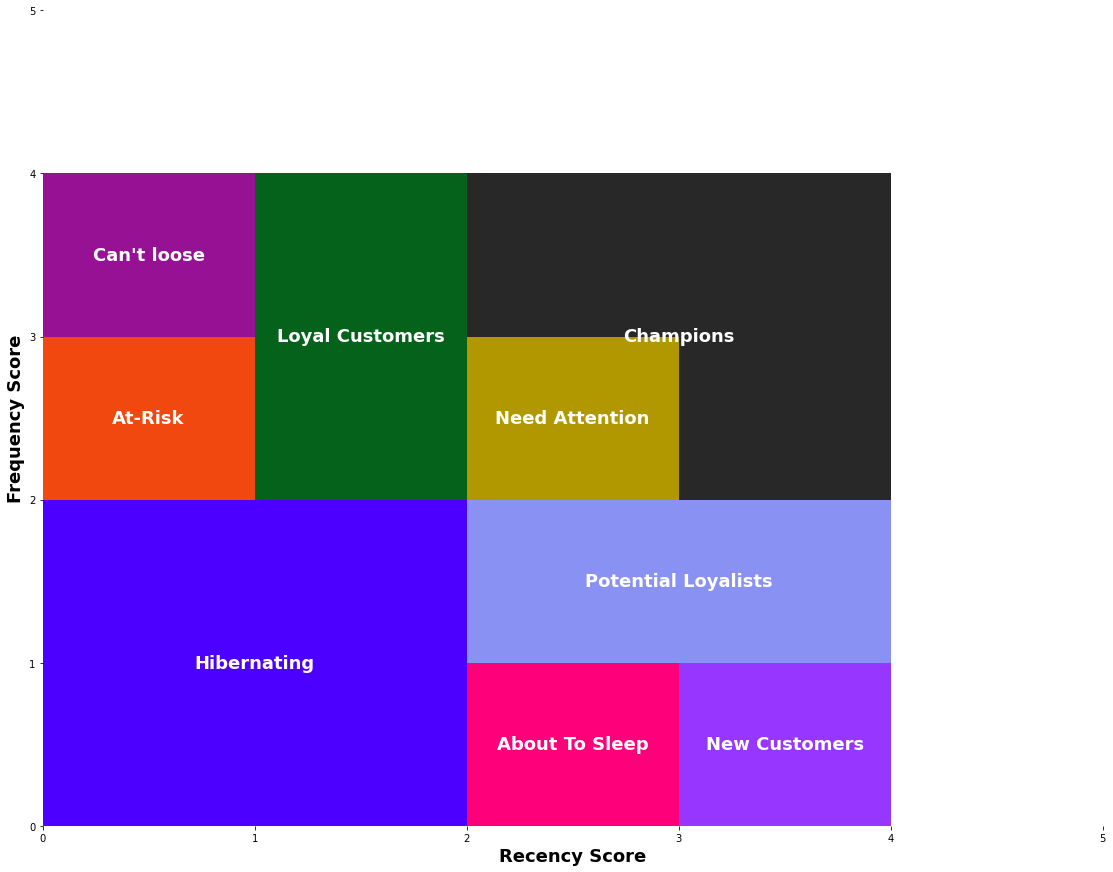

In [361]:
import matplotlib.pyplot as plt
rfm_coordinates = {"Champions": [2, 4, 0.4, 0.8],
                   "Loyal Customers": [2, 4, 0.2, 0.4],
                   "Can\'t loose": [3, 4, 0, 0.2],
                   "At-Risk": [2, 3, 0, 0.2],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 1, 0.4, 0.6],
                   "New Customers": [0, 1, 0.6, 0.8],
                   "Potential Loyalists": [1, 2, 0.4, 0.8],
                   "Need Attention": [2, 3, 0.4, 0.6]}

fig, ax = plt.subplots(figsize = (19, 15))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)
    
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
  
    
    ax.set_xlabel("Recency Score", fontsize = 18, fontweight = "bold")
    ax.set_ylabel("Frequency Score", fontsize = 18, fontweight = "bold")
    
sns.despine(left = True, bottom = True)
plt.show()

### 3. Строим графики по итогам  RFM-сегментации

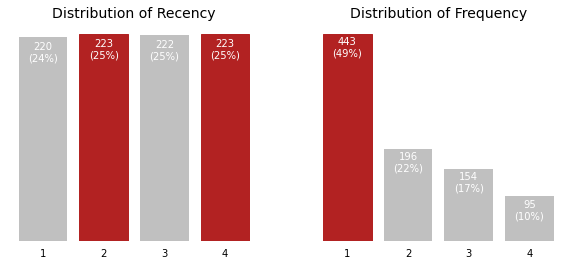

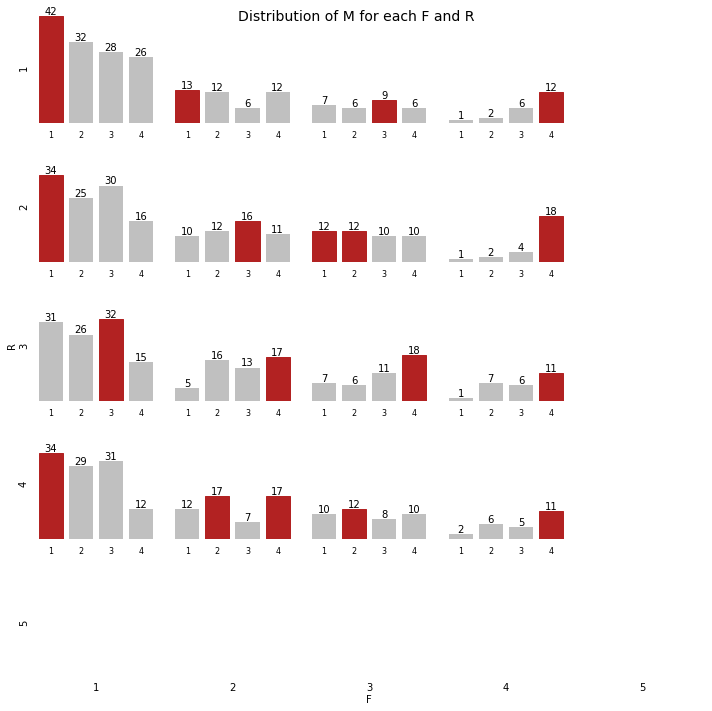

In [358]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()


Исходя из графиков видим,

- 1) Число пользоваталей по **Recency** распределено равномерно
- 2) Число полльзоваталей по **Frequency** распределено не равномерно, 72% (49% + 22%) покупают очень редко (это даже при учете выбора только тех пользоваталей, которые совершили более 3х покупок).
- 3) **Monetary** слабо кореллирует с **Frequency** и не зависит от **Recency**

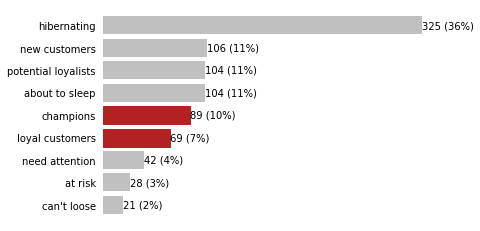

In [359]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

На графикее видно:

1) 47% пользователей или неактивны **hibernating** или в зоне риска **at risk** стать неактивными. 

2) Всего 17% процентов, лояльны **loyal** к нашему бренду и часто покупают **champions** наш товар

3) Заметно, что есть прирост новых пользователей **new customers**. 

4) 24% (**can\`t loose**, **potential loyalists**, **new customers**) пользователям необходимо повышенное внимание, для того чтобы перевести их на уровень выше. При грамотном их развитии они станут новыми лоялными клиентами

5) 15% (**need attention**, **about to sleep**) пользователей находятся на грани оттока.